# Video Game Sales Prediction - Machine Learning Lab

## Introduction and Setup
Welcome to this machine learning lab where we'll build a model to predict
whether a video game will be a "hit" based on its characteristics and sales data.
This notebook will guide you through the entire process, from data loading to
model evaluation and optimization.

Learning objectives:
1. Learn to preprocess and explore a real-world dataset
2. Build and evaluate a decision tree classifier
3. Optimize a model through hyperparameter tuning
4. Interpret model results and feature importance

In [ ]:
#install libraries if necessary

# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# Configure visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("colorblind")

In [ ]:
# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Download the Dataset

In [ ]:
# You can run this cell to download the dataset directly, or upload it manually!
import requests

url = 'https://www.kaggle.com/datasets/gregorut/videogamesales/download'
response = requests.get(url)

with open('videogamesales.zip', 'wb') as f:
	f.write(response.content)

print("Dataset downloaded successfully.")


Dataset downloaded successfully.


## Load the Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('vgsales.csv')

# Let's take a look at the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Rank                      Name Platform    Year         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo     41.49     29.02      3.77         8.46         82.74
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo     15.85     12.88      3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo     15.75     11.01      3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo     11.27      8.89     10.22         1.00         31.37


## Dataset Information

In [ ]:
# Get basic information about the dataset
print("\nDataset basic information:")
print(df.info())

# Get descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Dataset basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None

Descriptive statistics:
               Rank          Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000
mean

In [ ]:
# Cell 5:Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


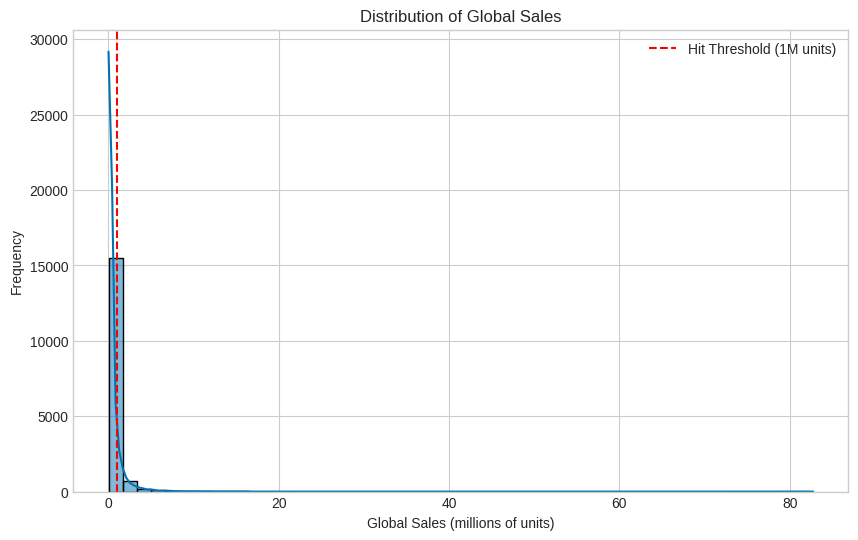

In [ ]:
# Cell 6: Data Visualization - Global Sales Distribution
# ====================================================
# Visualize the distribution of global sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (millions of units)')
plt.ylabel('Frequency')
plt.axvline(x=1, color='red', linestyle='--', label='Hit Threshold (1M units)')
plt.legend()
plt.show()

In [ ]:
# Cell 7: Create Target Variable
# ============================
# TASK: Create a binary target variable for "hit" games
# A game is considered a hit if it sold more than 1 million units (Global_Sales > 1)
# YOUR CODE HERE

df['Hit'] = (df['Global_Sales'] > 1).astype(int)

df[['Name', 'Global_Sales', 'Hit']].head()


,Name,Global_Sales,Hit
0,Wii Sports,82.74,1
1,Super Mario Bros.,40.24,1
2,Mario Kart Wii,35.82,1
3,Wii Sports Resort,33.00,1
4,Pokemon Red/Pokemon Blue,31.37,1


Hit Counts:
 Hit
0    14544
1     2054
Name: count, dtype: int64

Hit Proportion:
 Hit
0    0.87625
1    0.12375
Name: proportion, dtype: float64


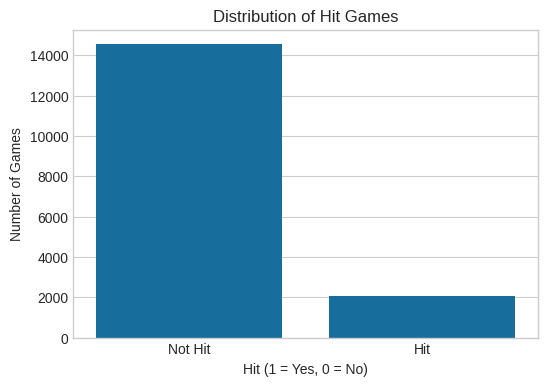

In [ ]:
# Cell 8: Analyze Target Distribution
# =================================
# Let's see the proportion of hits in our dataset
# YOUR CODE HERE

hit_counts = df['Hit'].value_counts()
hit_proportion = df['Hit'].value_counts(normalize=True)

print("Hit Counts:\n", hit_counts)
print("\nHit Proportion:\n", hit_proportion)

plt.figure(figsize=(6, 4))
sns.barplot(x=hit_counts.index, y=hit_counts.values)
plt.title('Distribution of Hit Games')
plt.xlabel('Hit (1 = Yes, 0 = No)')
plt.ylabel('Number of Games')
plt.xticks([0, 1], ['Not Hit', 'Hit'])
plt.show()


In [ ]:
# Cell 9: Drop Non-Informative Columns
# ==================================
# TASK: Drop non-informative columns
# Think about which columns won't help with prediction
# YOUR CODE HERE

# Drop columns that won’t help with prediction
df.drop(columns=['Rank', 'Name'], inplace=True)

# Preview updated dataframe
df.head()


,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Hit
0,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1
3,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1


In [ ]:
# Cell 10: Missing Value Analysis
# =============================
# Examine the 'Year' column which might have missing values

# Check for missing values in the 'Year' column
missing_year_count = df['Year'].isnull().sum()
missing_year_percentage = (missing_year_count / len(df)) * 100

print(f"Missing 'Year' values: {missing_year_count}")
print(f"Percentage missing: {missing_year_percentage:.2f}%")


Missing 'Year' values: 271
Percentage missing: 1.63%


In [ ]:
# Cell 11: Handle Missing Values
# ============================
# TASK: Handle missing values
# Option 1: Drop rows with missing values
# YOUR CODE HERE

# Option 2: Fill missing values with median or mean
# YOUR CODE HERE
# df_clean['Year'] = df_clean['Year'].fillna(df_clean['Year'].median())

# Option 1: Drop rows with missing values
# df_drop = df.dropna(subset=['Year'])

# Option 2: Fill missing values with the median year
df_fill = df.copy()
df_fill['Year'] = df_fill['Year'].fillna(df_fill['Year'].median())

df_clean = df_fill

df_clean[['Year']].isnull().sum()


,0
Year,0


In [ ]:
# Cell 12: Categorical Variable Analysis
# ===================================
# Let's identify categorical columns
categorical_columns = df_clean.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", categorical_columns)


Categorical columns: ['Platform', 'Genre', 'Publisher']


In [ ]:
# Cell 13: Encode Categorical Variables
# ==================================
# TASK: Encode categorical variables using LabelEncoder
# Label Encoder transforms categorical variables into numerical ones
# YOUR CODE HERE

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Platform', 'Genre', 'Publisher']:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))  # Convert to string in case of NaNs

df_clean[['Platform', 'Genre', 'Publisher']].head()


,Platform,Genre,Publisher
0,26,10,359
1,11,4,359
2,26,6,359
3,26,10,359
4,5,7,359


In [ ]:
# Cell 14: Feature Engineering (Optional)
# =====================================
# BONUS TASK: Feature Engineering
# Creating new features might improve model performance
# Example: Total regional sales besides global
# YOUR CODE HERE

df_clean['Total_Regional_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']

df_clean[['Total_Regional_Sales', 'Global_Sales']].head()


,Total_Regional_Sales,Global_Sales
0,82.74,82.74
1,40.24,40.24
2,35.83,35.82
3,33.00,33.00
4,31.38,31.37


In [ ]:
# Cell 15: Explore Processed Dataset
# ================================
# Let's look at the processed dataset
# YOUR CODE HERE


print("Shape of dataset:", df_clean.shape)
print("\nData types:\n", df_clean.dtypes)
print("\nFirst 5 rows:\n", df_clean.head())
print("\nSummary statistics:\n", df_clean.describe())


Shape of dataset: (16598, 11)

Data types:
 Platform                  int64
Year                    float64
Genre                     int64
Publisher                 int64
NA_Sales                float64
EU_Sales                float64
JP_Sales                float64
Other_Sales             float64
Global_Sales            float64
Hit                       int64
Total_Regional_Sales    float64
dtype: object

First 5 rows:
    Platform    Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Hit  Total_Regional_Sales
0        26  2006.0     10        359     41.49     29.02      3.77         8.46         82.74    1                 82.74
1        11  1985.0      4        359     29.08      3.58      6.81         0.77         40.24    1                 40.24
2        26  2008.0      6        359     15.85     12.88      3.79         3.31         35.82    1                 35.83
3        26  2009.0     10        359     15.75     11.01      3.28         2.96      

In [ ]:
# Cell 16: Split Features and Target
# ================================
# TASK: Split the data into features (X) and target (y)
# YOUR CODE HERE

X = df_clean.drop(columns=['Hit'])  # Features
y = df_clean['Hit']                # Target


In [ ]:
# Cell 17: Train-Test Split
# =======================
# TASK: Split the data into training and testing sets (80/20 split)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes to confirm the split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (13278, 10)
Testing features shape: (3320, 10)
Training target shape: (13278,)
Testing target shape: (3320,)


In [ ]:
# Cell 18: Train Initial Model
# ==========================
# TASK: Train a Decision Tree classifier with default parameters
# YOUR CODE HERE

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Cell 19: Make Predictions
# =======================
# TASK: Make predictions on the test set
# YOUR CODE HERE
                            # Probability of being a hit

y_pred = clf.predict(X_test)

y_proba = clf.predict_proba(X_test)[:, 1]  # Extract probability for class 1 (hit)

In [ ]:
# Cell 20: Calculate Evaluation Metrics
# ==================================
# TASK: Calculate evaluation metrics
# YOUR CODE HERE


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000


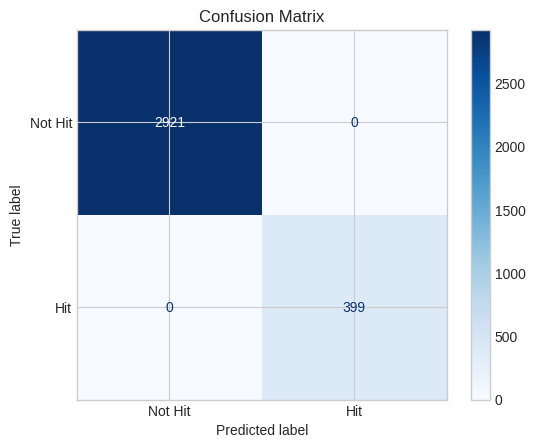

In [ ]:
# Cell 21: Confusion Matrix Visualization
# ====================================
# TASK: Visualize the confusion matrix
# YOUR CODE HERE

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Not Hit', 'Hit'], cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
